In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

In [204]:
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [205]:
df.shape

(768, 9)

In [206]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [207]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pisahkan fitur dan target

In [209]:
x = df.drop(["Outcome"], axis=1) # fitur 
y = df["Outcome"] # target

### Data Cleaning

##### Duplicated

In [210]:
df.duplicated().sum()

np.int64(0)

##### Missing Values

In [211]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


##### Nilai yang tidak seharusnya 0

In [212]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [213]:
kolomNol = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[kolomNol] = df[kolomNol].replace(0, np.nan)

In [214]:
nilai_median = df[kolomNol].median()
df[kolomNol] = df[kolomNol].fillna(nilai_median)
print((df == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


##### Outlier

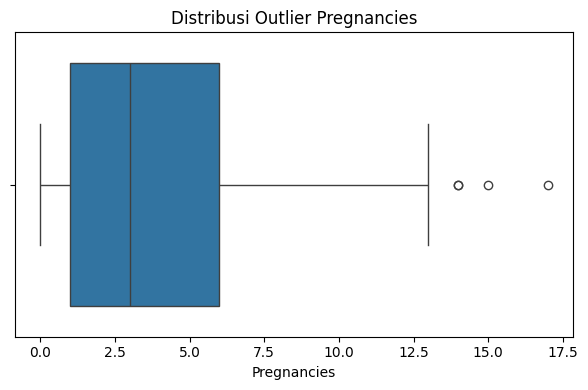

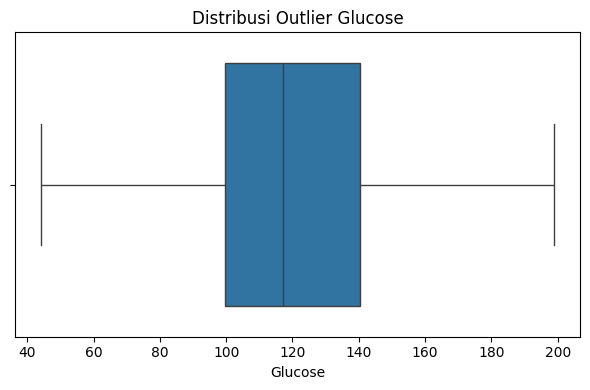

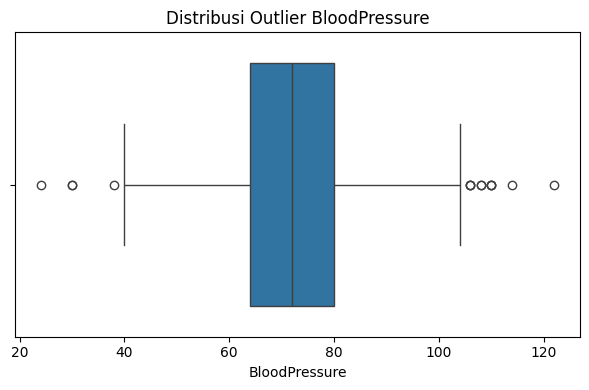

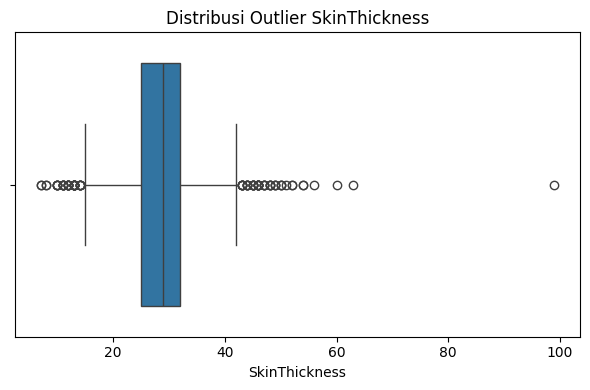

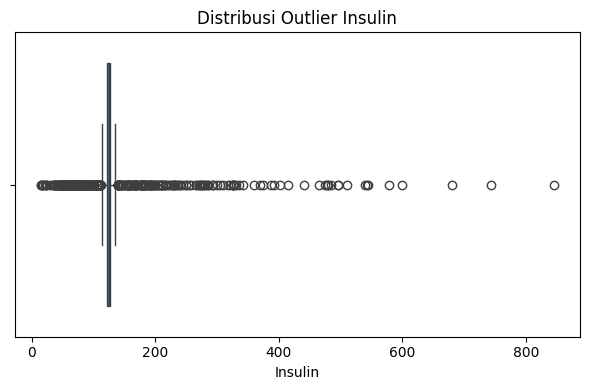

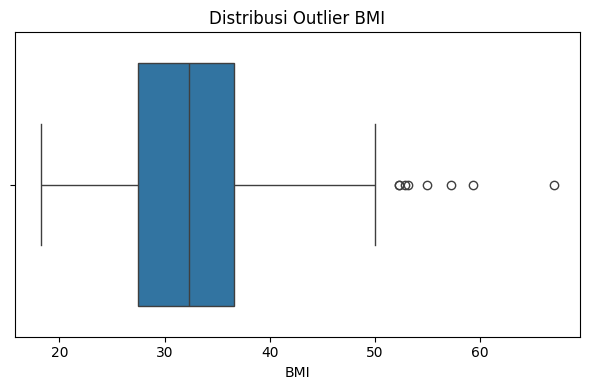

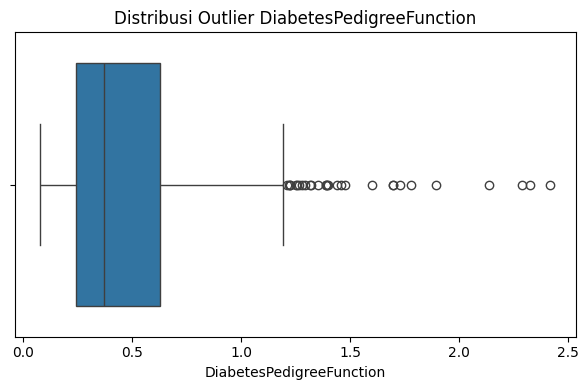

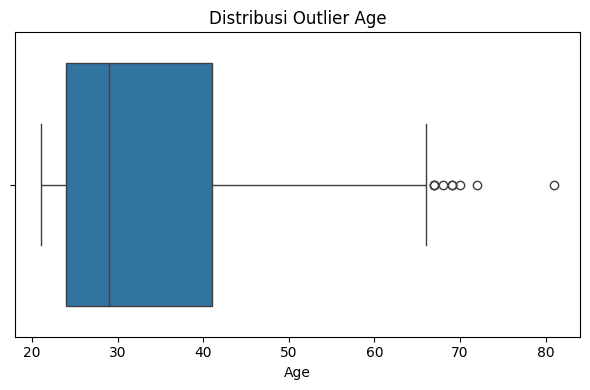

In [215]:
for col in x:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col).set_title(f"Distribusi Outlier {col}")
    plt.tight_layout()
plt.show()

In [216]:
for col in x:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df[col] = df[col].clip(lower=lower, upper=upper)

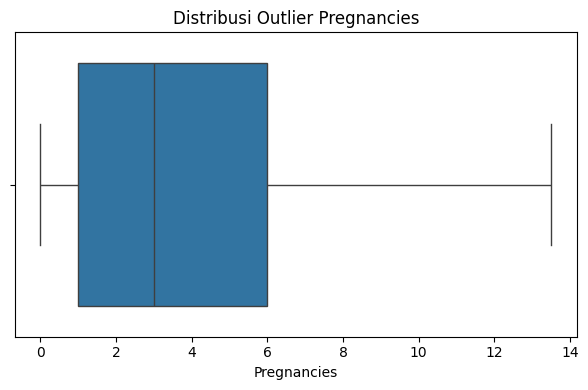

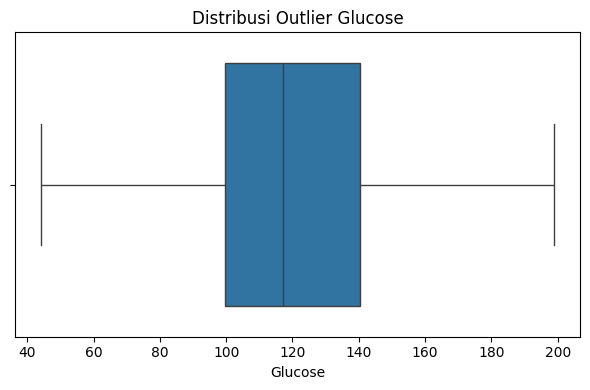

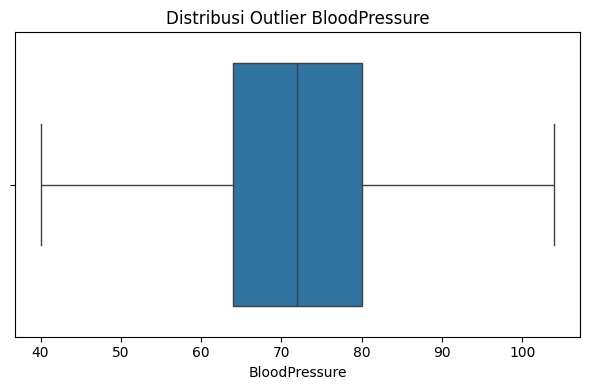

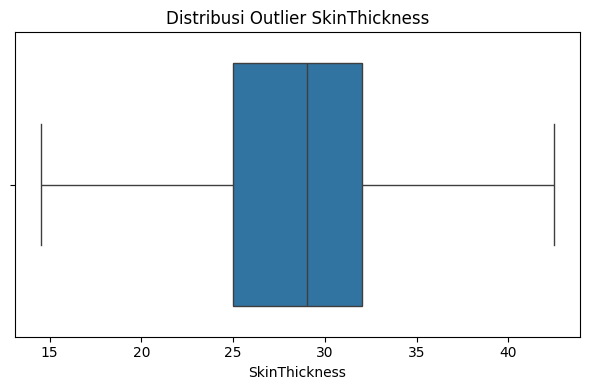

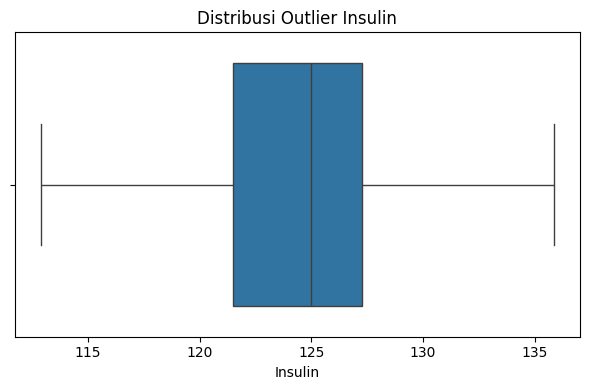

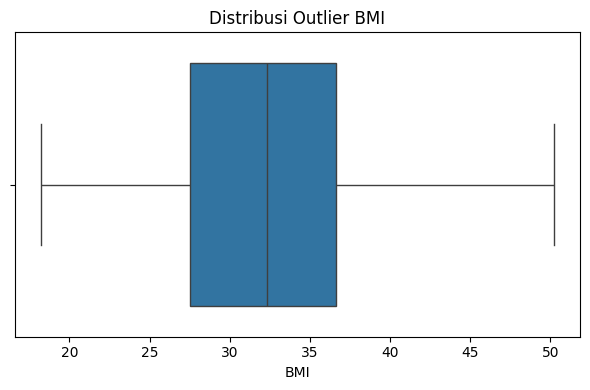

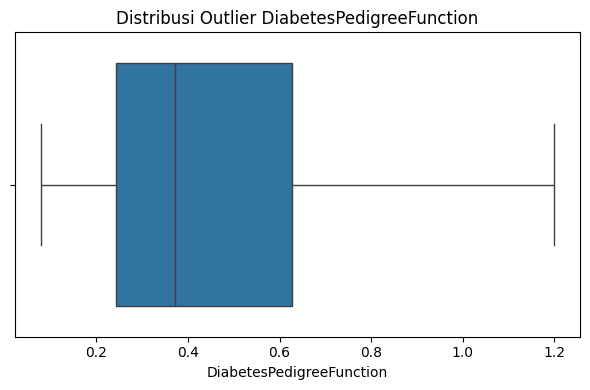

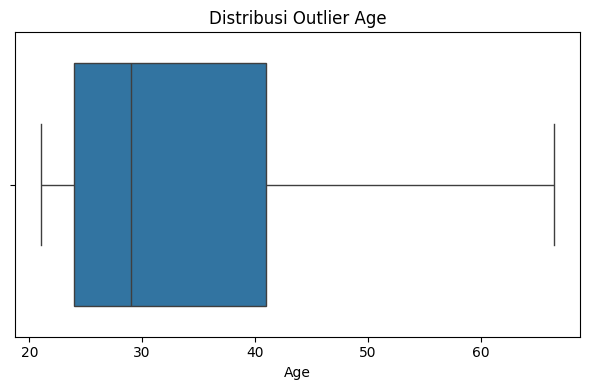

In [217]:
for col in x:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col).set_title(f"Distribusi Outlier {col}")
    plt.tight_layout()
plt.show()

### Analisis Data

##### 1. Apakah kadar Glukosa mempengaruhi kemungkinan menderita diabetes?

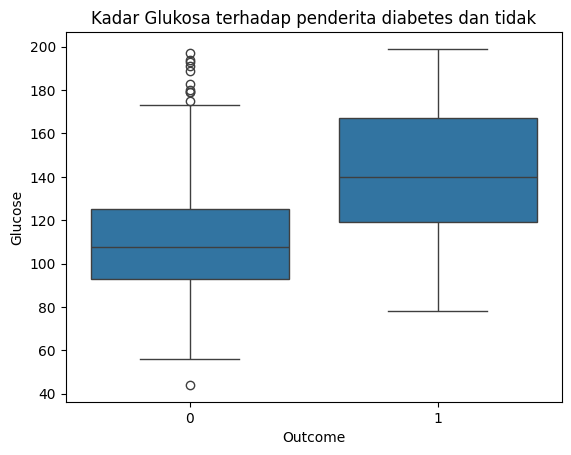

In [218]:
sns.boxplot(data=df, x="Outcome", y="Glucose")
plt.title("Kadar Glukosa terhadap penderita diabetes dan tidak")
plt.show()

Pasien yang mempunyai diabetes mempunyai kadar glukosa yang lebih tinggi daripada pasien yang tidak ada diabetes. Hal ini menunjukkan bahwa kadar gula darah adalah faktor penting untuk menentukan pasien terkena diabetes atau tidak.

##### 2. Bagaimana distribusi usia pada pasien dengan diabetes dibandingkan yang tidak?

In [219]:
age_diabetes_yes = df[df["Outcome"] == 1]["Age"]
age_diabetes_no = df[df["Outcome"] == 0]["Age"]

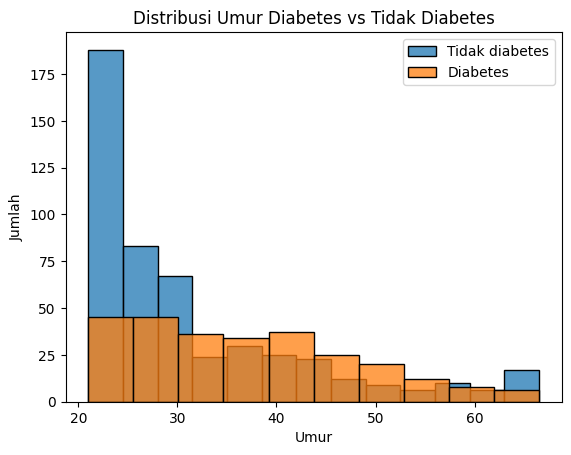

In [220]:
sns.histplot(age_diabetes_no, label="Tidak diabetes")
sns.histplot(age_diabetes_yes, label="Diabetes")

plt.legend()
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.title("Distribusi Umur Diabetes vs Tidak Diabetes")
plt.show()

Penderita diabetes lebih banyak di usia 30 sampai 60 ke atas. Paling tidak banyak terkena diabetes adalah usia 20 sampai 30.

##### 3. Berapa persentase pasien yang menderita diabetes ?

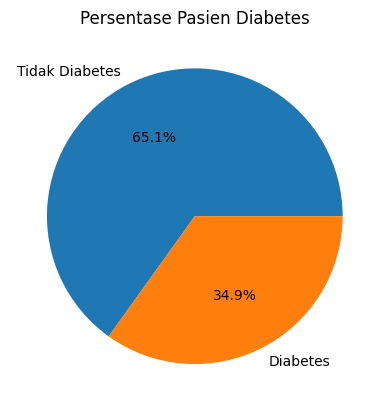

In [221]:
hitung_diabetes = df["Outcome"].value_counts()
label = ["Tidak Diabetes", "Diabetes"]

plt.pie(hitung_diabetes, autopct="%1.1f%%", labels=label)
plt.title("Persentase Pasien Diabetes")
plt.show()

Sebanyak 34.9% terdapat diabetes sehingga dapat disimpulkan bahwa lebih banyak yang tidak terdapat diabetes sebanyak 65.1%.

##### 4. Seberapa besar peran BMI dan Glukosa dalam memprediksi diabetes?

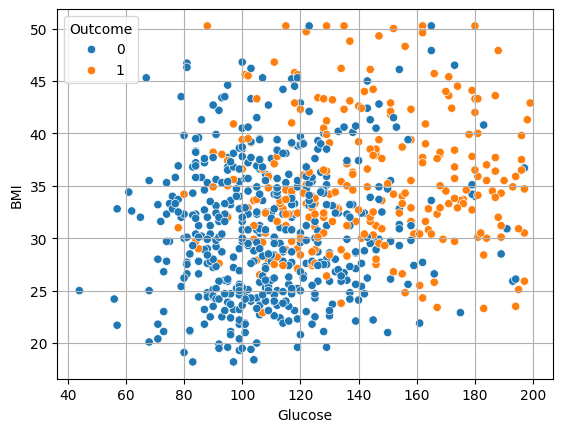

In [222]:
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome")
plt.grid(True)
plt.show()

Pada grafik menunjukkan bahwa pasien dengan nilai BMI dan glukosa yang tinggi terdapat diabetes.

##### 5. Berdasarkan hasil korelasi atau feature importance, fitur apa yang paling berkontribusi terhadap prediksi diabetes?

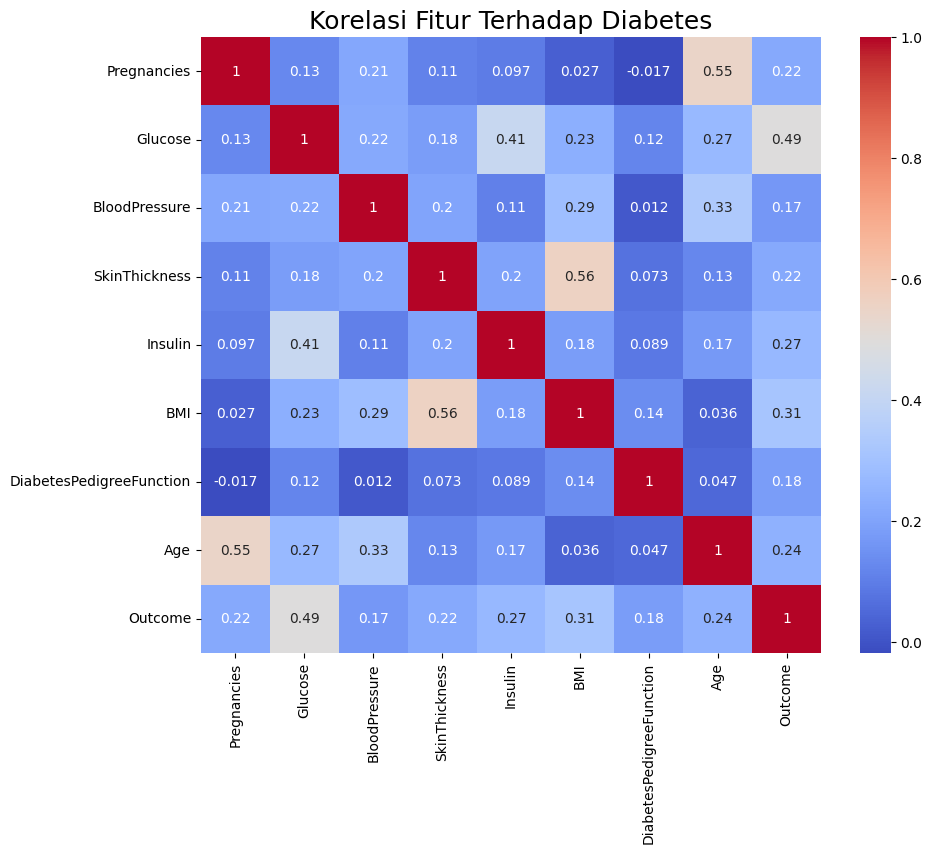

In [223]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur Terhadap Diabetes", fontsize=18)
plt.show()

Fitur yang paling berkorelasi untuk memprediksi diabetes adalah "Glucose" sebanyak 0.49 dan yang paling rendah adalah "BloodPressure" sebanyak 0,17. Untuk hubungan yang paling tinggi adalah antara "SkinThickness" dan "BMI" sebanyak 0.56.

### Split Data

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

joblib.dump((x_train, x_test, y_train, y_test), "data_clean.pkl")

['data_clean.pkl']

- 80% data training
- 20% data testing

simpan data bersih untuk digunakan di file untuk model